#### Print your name

In [1]:
## Your code here 
print("Exercise by: Janne Bragge")

Exercise by: Janne Bragge


# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='../data/assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [2]:
import torch
from torchvision import datasets, transforms
import sys
sys.path.insert(0, '../answers')
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

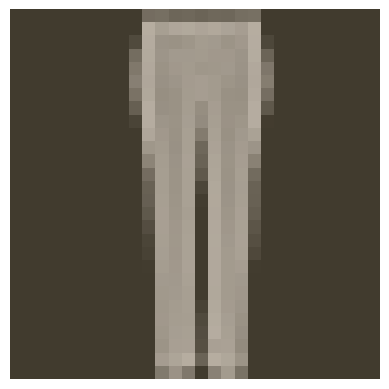

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your classifier network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.


***
### Exercise:
Build your own network based on these suggestion.

In [4]:
## Task 1:
## Your code here 
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the classifier network
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=64)
        self.fc4 = nn.Linear(in_features=64, out_features=10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)  # No activation here because it's logits
        return x


 

In [5]:
model = Classifier()
print(model)

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


***

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.



***
### Exercise:

**Part A**: Create network (model), define loss (criterion) and define optimizer.
```python
model = 
criterion = 
optimizer = 
```

In [6]:
## Task 2:
## Your code here 
import torch.optim as optim

# Create model instance
model = Classifier()

# Define loss function (criterion)
criterion = nn.CrossEntropyLoss()

# Define optimizer (SGD with learning rate 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)

 

In [7]:
print("Model:", model)
print("Loss:", criterion)
print("Optimizer:", optimizer)

Model: Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
Loss: CrossEntropyLoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


**Part B**: Train the network with training loop.
- see "Part 3 - Training Neural Networks (Exercises).ipynb" for tips.
- Calculate 5 epochs and print "Training Loss:" after every epoch

In [8]:
## Task 3:
## Your code here 

import torch

# Define training parameters
num_epochs = 5
training_losses = []  # List to store loss values for each epoch

for epoch in range(num_epochs):
    running_loss = 0.0  # To accumulate loss over batches

    for images, labels in trainloader:
        # Flatten the images
        images = images.view(images.shape[0], -1)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Compute average loss per epoch and store it
    print(f"Training loss: {running_loss / len(trainloader)}")
    # Print average loss per epoch
    epoch_loss = running_loss / len(trainloader)
    training_losses.append(epoch_loss)

# Print losses in list format
#print(training_losses)


Training loss: 1.3279207704036728
Training loss: 0.6076549179772578
Training loss: 0.5126705301373498
Training loss: 0.46773861702889014
Training loss: 0.4382559593552465


In [9]:
print(training_losses)

[1.3279207704036728, 0.6076549179772578, 0.5126705301373498, 0.46773861702889014, 0.4382559593552465]


**Part C**: Calculate the class probabilities for network output.
- see "Part 3 - Training Neural Networks (Exercises).ipynb" for tips.

Label: 1
Probabilities: [8.7952685e-06 9.9940395e-01 2.0612388e-06 4.5635176e-04 2.6626925e-05
 8.8720204e-05 1.6622246e-07 9.3287758e-07 8.0264835e-09 1.2353383e-05]


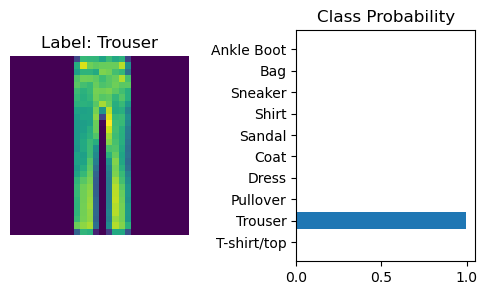

In [10]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Select a single image and label from the dataset
images, labels = next(iter(trainloader))  # Get a batch of images
image = images[0].view(1, 784)  # Flatten the first image
label = labels[0].item()

# Forward pass through the model
with torch.no_grad():  # No need to track gradients
    logits = model(image)

# Apply softmax to get probabilities
probabilities = F.softmax(logits, dim=1)

# Convert tensor to numpy array for visualization
probabilities_numpy = probabilities.numpy().squeeze()

# Print the label and probabilities
print("Label:", label)
print("Probabilities:", probabilities_numpy)



# Define class names for FashionMNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]

# Plot the image
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(images[0].squeeze(), cmap="viridis")
plt.axis("off")
plt.title(f"Label: {class_names[label]}")

# Plot class probabilities
plt.subplot(1,2,2)
plt.barh(class_names, probabilities_numpy)
plt.title("Class Probability")
plt.subplots_adjust(wspace=0.6)
plt.show()


In [11]:
print(probabilities)

tensor([[8.7953e-06, 9.9940e-01, 2.0612e-06, 4.5635e-04, 2.6627e-05, 8.8720e-05,
         1.6622e-07, 9.3288e-07, 8.0265e-09, 1.2353e-05]])


***

## Reflection

- Does network Training Loss decrease monotonously? And why this is important?
- Re-train network few times. Where network is unsure? How about if you train it only 1 epoch? 


*Your answers here...*

1) No, training loss does not always decrease monotonously due to mini-batch variations, learning rate fluctuations, and optimization dynamics. However, the overall trend should decrease. This is important because it indicates that the model is learning and improving. If training loss doesn't decrease, the model might not be optimizing correctly. But if it decreases while validation loss increases, the model could be overfitting. (GeekForGeeks)

https://www.geeksforgeeks.org/training-and-validation-loss-in-deep-learning/ (5.2.2025)

2) The network is unsure when class probabilities are spread out, meaning it lacks confidence. This happens with ambiguous images or early in training. If trained for only 1 epoch, the model won’t learn enough, leading to high uncertainty and poor predictions. More epochs improve confidence, but too many can cause overfitting. Chollet, F. (2021)

Chollet, F. (2021). Deep learning with Python (2nd ed.). Manning Publications.

### Check your answers by running following cell:

In [12]:
# Do not change this code!

import sys
sys.path.insert(0, '../answers/part4/')
from part4_check import *


print("Results:\n")

print("Model:", model)
print("Loss:", criterion)
print("Optimizer:", optimizer)

training_losses_check(training_losses)
probabilities_check(probabilities)

Results:

Model: Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
Loss: CrossEntropyLoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

 [1.3279207704036728, 0.6076549179772578, 0.5126705301373498, 0.46773861702889014, 0.4382559593552465]
'training_losses' is ok!

 tensor([[8.7953e-06, 9.9940e-01, 2.0612e-06, 4.5635e-04, 2.6627e-05, 8.8720e-05,
         1.6622e-07, 9.3288e-07, 8.0265e-09, 1.2353e-05]])
'probabilities' is ok!


### Great work!